In [18]:
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_formats = ['svg']  # this is needed for the plots in a jupyter notebook

In [19]:
# import unbinned file

data_unbinned = np.loadtxt('converted_data/DAMIC/DAMIC.txt')

# import binned bck model

bck_model = np.loadtxt('converted_data/DAMIC/DAMIC_bck_model.txt')

In [24]:
# get bin edges from binned bck model

bin_edges = np.concatenate((bck_model[:,0], [bck_model[-1,1]]))

# create histogram from unbinned data with same binning

data_binned, _ = np.histogram(data_unbinned, bin_edges)
data_binned = data_binned / (bin_edges[1:] - bin_edges[:-1])

# subsctract background from new binned data

data_nobck = data_binned - bck_model[:,2] * 10.927
data_nobck[data_nobck < 0] = 0

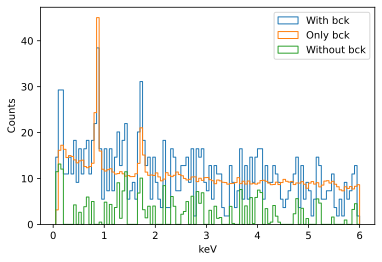

Bin width: 0.05 keV


In [27]:
# plot histogram of binned data with and without background

plt.hist(bin_edges[:-1], bin_edges, weights=data_binned/ 10.927, histtype='step', label='With bck')
plt.hist(bin_edges[:-1], bin_edges, weights=bck_model[:,2], histtype='step', label='Only bck')
plt.hist(bin_edges[:-1], bin_edges, weights=data_nobck/ 10.927, histtype='step', label='Without bck')
plt.xlabel('keV')
plt.ylabel('Counts')
plt.legend()
plt.show()

print('Bin width: {} keV'.format(bin_edges[1] - bin_edges[0]))

In [30]:
np.savetxt('converted_data/DAMIC/DAMIC_nobck.txt', np.column_stack([bin_edges[:-1], bin_edges[1:], data_nobck]))